## People analytics or people data science
Predict when employees are going to quit by understanding the main drivers of employee churn.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
pd.options.display.max_colwidth = 100


In [2]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [87]:
hr2 = pd.read_csv('data/employee_retention_data.csv')
hr = pd.read_csv('data/employee_retention_data.csv')
hr.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


### I create a new feature called 'quit' that is 1 for employees that quit and 0 for employees that don't.

In [88]:
hr['quit']=1
hr['quit'].head()

0    1
1    1
2    1
3    1
4    1
Name: quit, dtype: int64

In [89]:
hr['quit_date'].isnull().sum()

11192

In [90]:
hr.loc[(hr['quit_date'].isnull()), 'quit']=0
hr.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1


## I fill quit_date with 2015-12-13 the last date I have information about (if the employee is still employed as of 2015/12/13, this field is NA)

In [91]:
hr['quit_date']=hr['quit_date'].fillna ('2015-12-13')

In [92]:
hr['join_date']=pd.to_datetime(hr['join_date'])
hr['quit_date']=pd.to_datetime(hr['quit_date'])

In [93]:
hr.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-13,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1


## I create another new feature, time_at_company i.e., the time an employee spent at the company. This is the time they have been at the company so far if they have not quit.

In [94]:
hr['time_at_company']=hr['quit_date']-hr['join_date']


In [95]:
hr['time_at_company'][1].total_seconds()

29376000.0

In [96]:
#hr['join_date']=hr['join_date'].apply(lambda x:x.total_seconds()/3600/24)
# hr['quit_date']=hr['quit_date'].apply(lambda x:x.total_seconds()/3600/24)
hr['time_at_company']=hr['time_at_company'].apply(lambda x:x.total_seconds()/3600/24)

In [97]:
hr.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date          0
quit               0
time_at_company    0
dtype: int64

In [98]:
hr3=hr.copy(deep=True)

## First look at the data

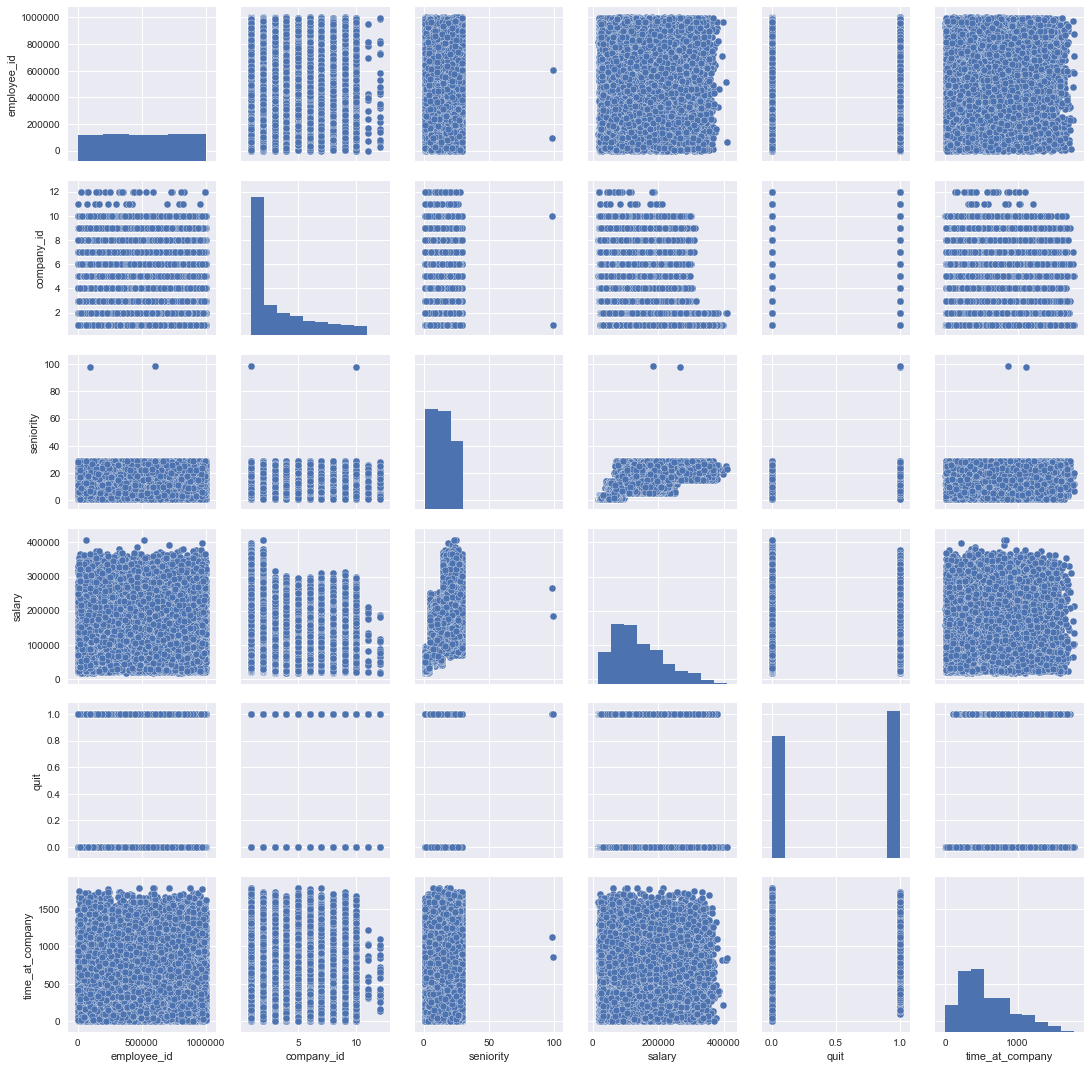

In [99]:
sns.pairplot(hr)

### Salary increases with seniority; Employees don't quit very close to join_date; Seniority has two obvious outliers that might need looking into

In [100]:
hr['seniority'].describe()

count    24702.000000
mean        14.127803
std          8.089520
min          1.000000
25%          7.000000
50%         14.000000
75%         21.000000
max         99.000000
Name: seniority, dtype: float64

In [101]:
hr['seniority'].value_counts(ascending=True)

98       1
99       1
28     585
29     626
27     642
26     694
25     715
24     743
22     764
21     782
23     785
20     844
1      861
18     872
3      881
17     893
13     894
4      895
19     910
15     911
14     920
11     924
10     927
7      928
5      936
16     936
2      942
9      944
6      950
12     988
8     1008
Name: seniority, dtype: int64

In [102]:
hr=hr[hr['seniority']<98]  # dropping outliers

In [103]:
hr['seniority'].describe() 

count    24700.000000
mean        14.120972
std          8.054137
min          1.000000
25%          7.000000
50%         14.000000
75%         21.000000
max         29.000000
Name: seniority, dtype: float64

In [104]:
hr.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit,time_at_company
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-13,0,426.0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1,1040.0


In [105]:
# hr.groupby(['company_id','quit']).agg({'quit':['count'], 'time_at_company':['mean']})

In [106]:
# start = pd.Timestamp('2011-01-23')
# end = pd.Timestamp('2015-12-13')
# total=start-end
# total

In [107]:
# start = pd.Timestamp('2011-01-23')
# end = pd.Timestamp('2015/12/13')

# np.linspace(start.value, end.value, 1785)  

# pd.to_datetime(np.linspace(start.value, end.value, 1785))

In [108]:
hr.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit,time_at_company
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-13,0,426.0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1,1040.0


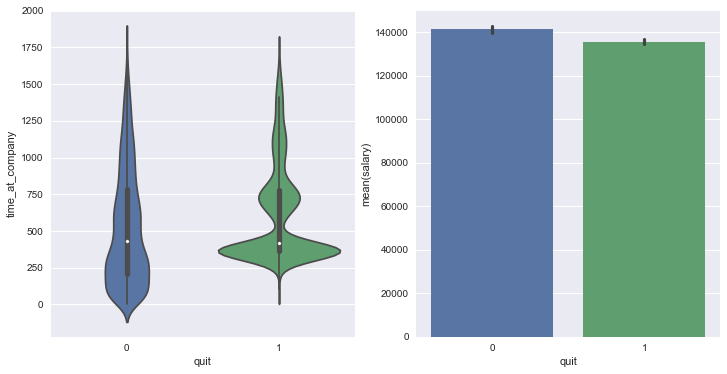

In [109]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 6))


# sns.countplot(x='Age_years',data=tdata2, ax=ax1, hue='Solve Match Pos')
g=sns.violinplot(y=hr['time_at_company'],x=y1, ax=ax1)
g=sns.barplot(y=hr['salary'],x=y1, ax=ax2)


### Violin plot suggests most employees quit after working for a year, then 2 years. Employees that quit get paid a little less than those that don't overall

In [111]:
hr=pd.get_dummies(columns=['dept'], data=hr) #One hot encoding
hr.head()

,employee_id,company_id,seniority,salary,join_date,quit_date,quit,time_at_company,dept_customer_service,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales
0,13021.0,7,28,89000.0,2014-03-24,2015-10-30,1,585.0,1,0,0,0,0,0
1,825355.0,7,20,183000.0,2013-04-29,2014-04-04,1,340.0,0,0,0,0,1,0
2,927315.0,4,14,101000.0,2014-10-13,2015-12-13,0,426.0,0,0,0,0,1,0
3,662910.0,7,20,115000.0,2012-05-14,2013-06-07,1,389.0,1,0,0,0,0,0
4,256971.0,2,23,276000.0,2011-10-17,2014-08-22,1,1040.0,0,1,0,0,0,0


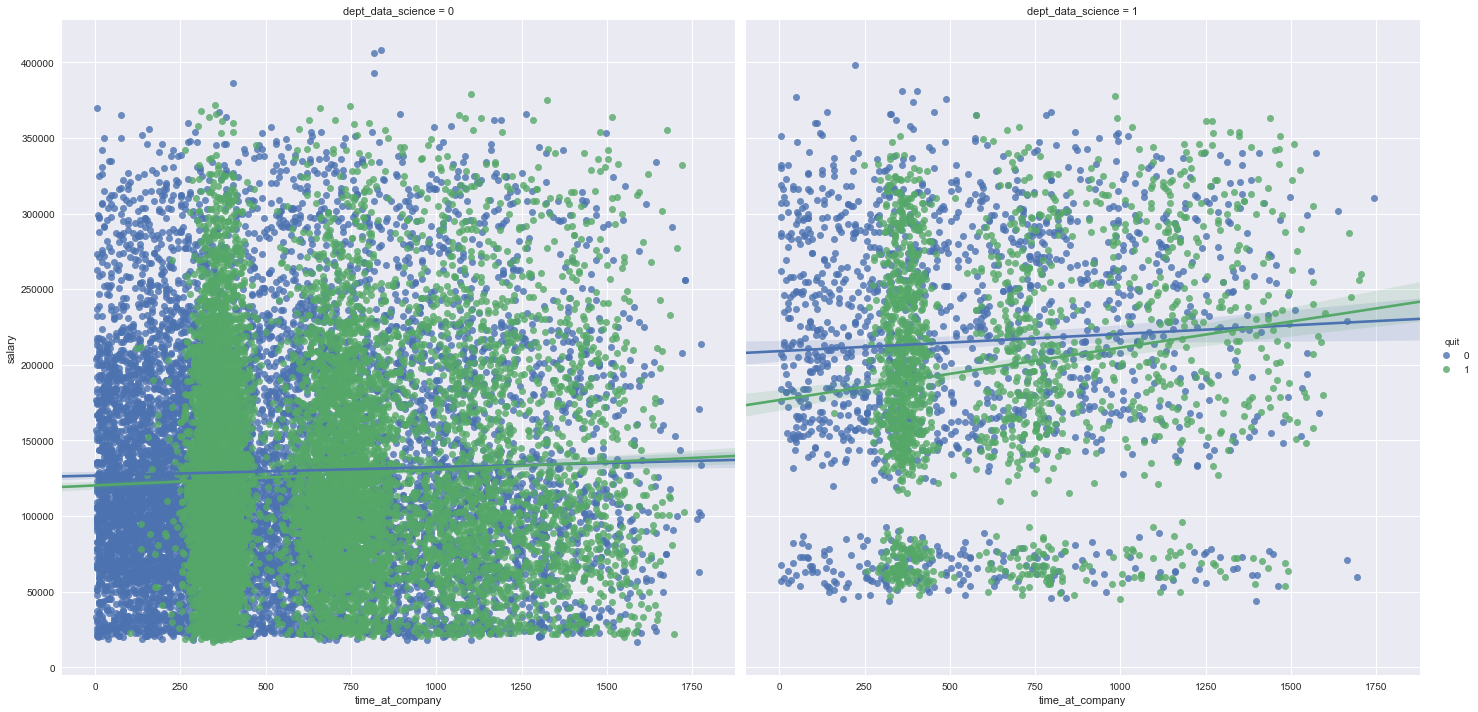

In [112]:

g=sns.lmplot(y='salary',x='time_at_company',data=hr, hue='quit',col='dept_data_science',  size=10)
# g=sns.lmplot(y=hr['seniority'],x=hr['time_at_company'],hue=y1)

### Another example of the same, plot on the right shows most data scientists quit after a year.

In [115]:
hr['dept']=hr2['dept']

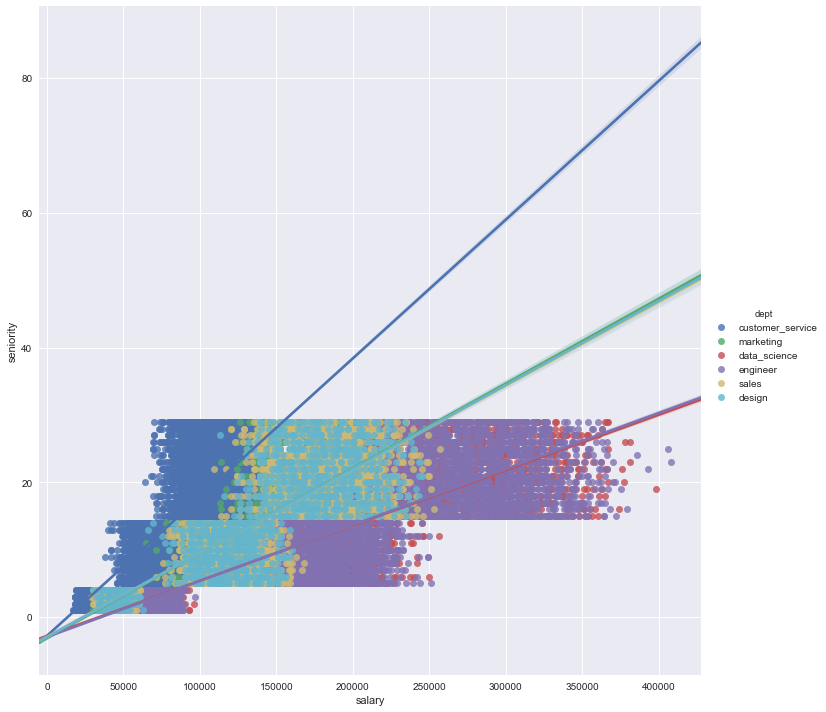

In [116]:
g=sns.lmplot(y='seniority',x='salary',data=hr, hue='dept', size=10)

###  Salary increases with seniority and varies between different departments as expected

## Using machine learning to predict if an employee will stay or quit

In [117]:
y1=hr['quit'].copy() # Make a copy of labels



In [118]:
hr.drop(labels=['quit', 'join_date', 'quit_date', 'employee_id', 'dept'], axis=1, inplace=True)

In [120]:
# hr=pd.get_dummies(columns=['dept'], data=hr) #One hot encoding
# hr.head()

In [121]:
sub_train=hr.copy(deep=True)
sub_train.head()

,company_id,seniority,salary,time_at_company,dept_customer_service,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales
0,7,28,89000.0,585.0,1,0,0,0,0,0
1,7,20,183000.0,340.0,0,0,0,0,1,0
2,4,14,101000.0,426.0,0,0,0,0,1,0
3,7,20,115000.0,389.0,1,0,0,0,0,0
4,2,23,276000.0,1040.0,0,1,0,0,0,0


In [122]:

from sklearn import preprocessing
from sklearn.model_selection import train_test_split #Split data into test and train
data_train, data_test, Y_train, Y_test= train_test_split(sub_train, y1, test_size=0.3, random_state=5) # 70:30 split

# T=preprocessing.StandardScaler().fit_transform(data_train)

X_train=data_train
X_test=data_test



# X_train=preprocessing.MinMaxScaler().fit_transform(data_train)
# X_test=preprocessing.MinMaxScaler().fit_transform(data_test)
#T=preprocessing.MaxAbsScaler().fit_transform(data_train)
#T=data_train
#T=preprocessing.Normalizer().fit_transform(data_train)
# Random forest

random_forest = RandomForestClassifier(n_estimators=150,min_samples_leaf=5, max_depth=3, max_features=3)
random_forest.fit(X_train, Y_train)
Y_pred_RF = random_forest.predict(X_test)
score_random_forest_train=random_forest.score(X_train, Y_train)*100
score_random_forest_train

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=3, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

69.959514170040478

In [123]:
score_random_forest_test=random_forest.score(X_test, Y_test)*100
score_random_forest_test

69.932523616734144

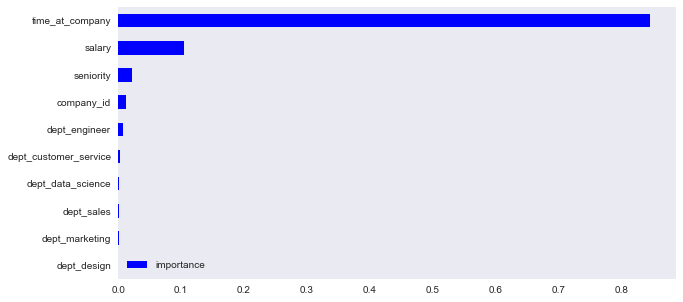

In [124]:
# predicting feature importance

names = hr.columns
ratios = random_forest.feature_importances_
#ratios

feature_important = pd.DataFrame(index=names, data=ratios, columns=['importance'])
feature_important = feature_important.sort_values(by=['importance'], ascending=True)
feature_important.plot(kind='barh', stacked=True, color=['blue'], grid=False, figsize=(10, 5))



In [125]:
# Decision Tree

decision_tree = DecisionTreeClassifier(min_samples_leaf=10,  max_features=8)
decision_tree.fit(X_train, Y_train)
Y_pred_DT = decision_tree.predict(X_test)
score_DT_train = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(score_DT_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=8, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

87.34


In [126]:
score_DT_test = round(decision_tree.score(X_test, Y_test) * 100, 2)
print(score_DT_test)

79.8


In [127]:
#3-fold cross validation to check for overfitting 

from sklearn import cross_validation as cval

cval_score=cval.cross_val_score(decision_tree, sub_train, y1, cv=3)

In [128]:
mean_cval=cval_score.mean()*100
std_cval=cval_score.std()*100
mean_cval
std_cval

81.214738575953632

1.4293892556561345

In [129]:
from sklearn import metrics
print(metrics.classification_report( Y_test, Y_pred_RF))

             precision    recall  f1-score   support

          0       0.95      0.36      0.52      3398
          1       0.65      0.99      0.78      4012

avg / total       0.79      0.70      0.66      7410



In [130]:
from sklearn import metrics
print(metrics.classification_report( Y_test, Y_pred_DT))

             precision    recall  f1-score   support

          0       0.79      0.76      0.78      3398
          1       0.80      0.83      0.82      4012

avg / total       0.80      0.80      0.80      7410



## Time spent at the company seems to be the most determining feature for whether an employee will quit. 

## DT with 3-fold cross validation has an accuracy of 81.4 +/- 2.3%

## RF has a lower accuracy ~ 70% but has a very high recall (99%) for employees that quit, which is more important for an attrition model since it would be advantageous to identify as many employees that might quit as possible. This allows for offering incentives to these employees and making them stay if desired.

In [131]:
# hr['quit']=y1

In [132]:
# # Logistic Regression

# logreg = LogisticRegression()
# logreg.fit(X_train, Y_train)
# Y_pred = logreg.predict(X_test)
# score_log_train = round(logreg.score(X_train, Y_train) * 100, 2)
# print(score_log_train)



In [133]:
# score_log_test= round(logreg.score(X_test, Y_test) * 100, 2)
# print(score_log_test)

## Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13.
## That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000.
## You should create a table with 3 columns: day, employee_headcount, company_id.

In [134]:
hr.head()

,company_id,seniority,salary,time_at_company,dept_customer_service,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales
0,7,28,89000.0,585.0,1,0,0,0,0,0
1,7,20,183000.0,340.0,0,0,0,0,1,0
2,4,14,101000.0,426.0,0,0,0,0,1,0
3,7,20,115000.0,389.0,1,0,0,0,0,0
4,2,23,276000.0,1040.0,0,1,0,0,0,0


In [135]:
hr.describe()

,company_id,seniority,salary,time_at_company,dept_customer_service,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales
count,24700.000000,24700.000000,24700.000000,24700.000000,24700.000000,24700.000000,24700.000000,24700.000000,24700.000000,24700.000000
mean,3.426802,14.120972,138176.275304,574.285142,0.371660,0.129150,0.055870,0.186721,0.128178,0.128421
std,2.699752,8.054137,76056.331953,361.585465,0.483258,0.335372,0.229676,0.389695,0.334295,0.334565
min,1.000000,1.000000,17000.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.000000,79000.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,14.000000,123000.000000,424.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,21.000000,187000.000000,781.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,29.000000,408000.000000,1777.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
hr.company_id.value_counts()

1     8485
2     4222
3     2749
4     2062
5     1755
6     1291
7     1224
8     1047
9      961
10     864
12      24
11      16
Name: company_id, dtype: int64

In [138]:
d = pd.date_range(start='2011-01-23', end='2015/12/13', freq='D')    
print(d)

DatetimeIndex(['2011-01-23', '2011-01-24', '2011-01-25', '2011-01-26',
               '2011-01-27', '2011-01-28', '2011-01-29', '2011-01-30',
               '2011-01-31', '2011-02-01',
               ...
               '2015-12-04', '2015-12-05', '2015-12-06', '2015-12-07',
               '2015-12-08', '2015-12-09', '2015-12-10', '2015-12-11',
               '2015-12-12', '2015-12-13'],
              dtype='datetime64[ns]', length=1786, freq='D')


In [139]:
hrgrped=pd.DataFrame(data=d, columns=["day"])
hrgrped.head()

,day
0,2011-01-23
1,2011-01-24
2,2011-01-25
3,2011-01-26
4,2011-01-27


In [140]:
hrcompany=pd.DataFrame(data=[1,2,3,4,5,6,7,8,9,10,11,12], columns=["company_id"])

In [141]:
hrcompany.head()

,company_id
0,1
1,2
2,3
3,4
4,5


In [142]:
hrgrped['key']=1
hrcompany['key']=1
df = pd.merge(hrgrped, hrcompany, on='key')
del df['key']
df.head(20)

,day,company_id
0,2011-01-23,1
1,2011-01-23,2
2,2011-01-23,3
3,2011-01-23,4
4,2011-01-23,5
5,2011-01-23,6
6,2011-01-23,7
7,2011-01-23,8
8,2011-01-23,9
9,2011-01-23,10


In [143]:
# hin=hr[((hr["join_date"]==pd.to_datetime('2015-10-30') ) ) & (hr["company_id"]==1)].groupby('company_id')['company_id'].count()
# hin

In [144]:
# hout=hr[((hr["quit_date"]==pd.to_datetime('2015-10-30') )&(hr["quit"]==1) ) & (hr["company_id"]==1)].groupby('company_id')['company_id'].count()

In [145]:
hr=hr3

In [146]:
def summer (row1):
    head_count_in=hr[(hr["join_date"]==row1["day"]) & (hr["company_id"]==row1["company_id"])].groupby('company_id')['company_id'].count()
    head_count_out=hr[((hr["quit_date"]==row1["day"] )&(hr["quit"]==1) ) & (hr["company_id"]==row1["company_id"])].groupby('company_id')['company_id'].count()

    head_count_val_in=head_count_in.values.tolist()  #[0]     
    head_count_val_out=head_count_out.values.tolist()
    
    if len (head_count_val_in)==0:
        head_count_val_in.append(0)
    if len (head_count_val_out)==0:
        head_count_val_out.append(0)
      
    
    head_count=head_count_val_in[0]-head_count_val_out[0]
    return head_count

In [147]:
vals=df.apply(summer, axis=1)

## employee_influx is the net influx of employees on a single day. If 10 employees join that day and 5 leave influx = 5

In [150]:
df['employee_influx']=vals
df.head(5)

,day,company_id,employee_influx
0,2011-01-23,1,0
1,2011-01-23,2,0
2,2011-01-23,3,0
3,2011-01-23,4,0
4,2011-01-23,5,0


In [151]:
# df.employee_influx.value_counts()

[(0, 500)]

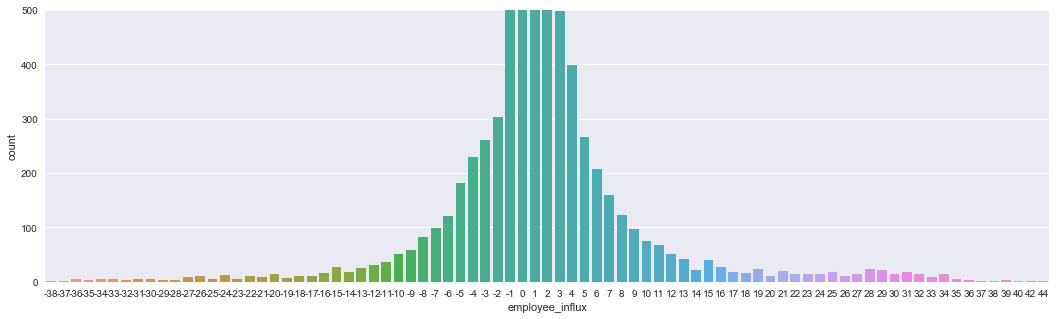

In [152]:
f, (ax2) = plt.subplots(1,1,figsize=(18, 5))


# sns.countplot(x='Age_years',data=tdata2, ax=ax1, hue='Solve Match Pos')
g=sns.countplot(x='employee_influx',data=df, ax=ax2)
g.set(ylim=(0, 500))

## employee_headcount is the number of employees working at the company on a certain day

In [154]:
df['employee_headcount']=df.groupby('company_id')['employee_influx'].cumsum()

df.head(1)

,day,company_id,employee_influx,employee_headcount
0,2011-01-23,1,0,0


## churn is the churn/attrition rate of employees over the period

In [351]:
churn_factor=df.groupby('company_id')['employee_headcount'].last()/2
churn_factor

company_id
1     1932.5
2     1008.0
3      609.0
4      454.5
5      386.0
6      289.5
7      266.0
8      234.0
9      216.0
10     192.5
11       2.0
12       6.0
Name: employee_headcount, dtype: float64

In [353]:
def churn (row1):
    val=row1['employee_headcount']/churn_factor[row1['company_id']]
    return val
    

In [356]:
df['churn']=df.apply(churn, axis=1)

In [364]:
df1=df[df['company_id']==11]
df1.head()

,day,company_id,employee_influx,employee_headcount,churn
10,2011-01-23,11,0,0,0.0
22,2011-01-24,11,0,0,0.0
34,2011-01-25,11,0,0,0.0
46,2011-01-26,11,0,0,0.0
58,2011-01-27,11,0,0,0.0


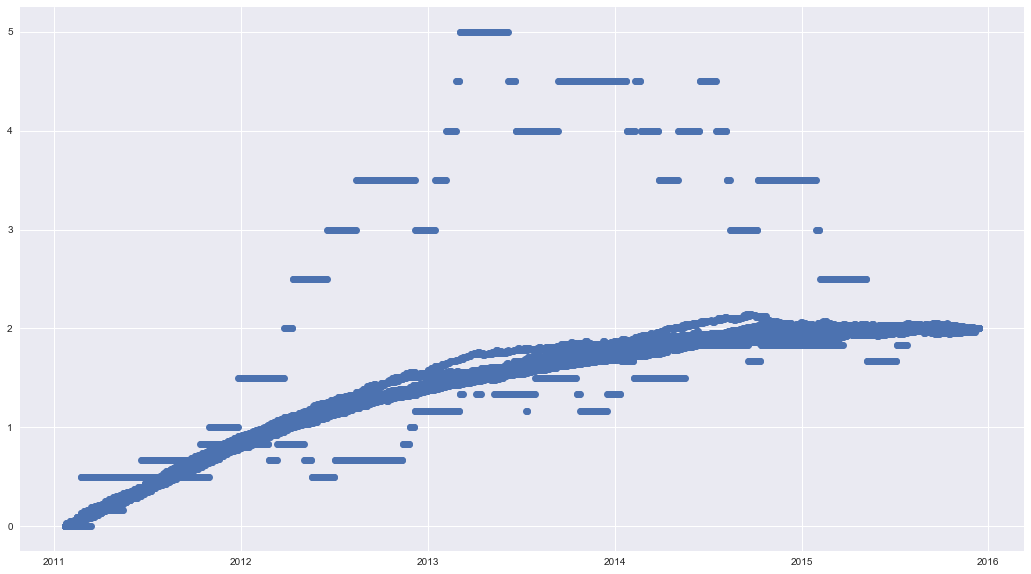

In [475]:
f, (ax2) = plt.subplots(1,1,figsize=(18, 10))
plt.plot_date(df['day'], df['churn'])

## Churn rate appears similar for all companies (excluding the two with very few employess)

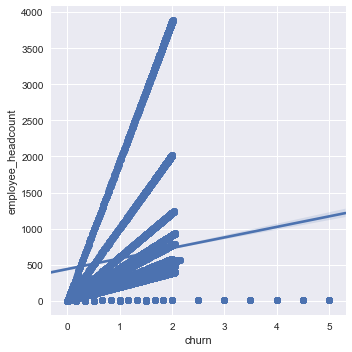

In [367]:
g=sns.lmplot('churn','employee_headcount',data=df)
